In [1]:
using Revise
using ConvexHullPricing
using DataFrames
using Plots
using JLD2
using ProgressBars, JuMP, Gurobi

const UT = ConvexHullPricing.Utilitaries
const OPT = ConvexHullPricing.Optimizer

Set parameter Username
Academic license - for non-commercial use only - expires 2024-10-03
Set parameter Username
Academic license - for non-commercial use only - expires 2024-10-03


ConvexHullPricing.Optimizer

In [2]:
ThermalGen = ConvexHullPricing.Utilitaries.ThermalGen(
    MinRunCapacity = [6],
    MaxRunCapacity = [16],
    RampUp = [5],
    RampDown = [5],
    StartUp = [6],
    ShutDown = [6],
    UpTime = [1],
    DownTime = [1],
    NoLoadConsumption = [10],
    MarginalCost = [53],
    FixedCost = [30],
)
instance = ConvexHullPricing.Utilitaries.Instance(
    LostLoad = 3000,
    Load = [6 11 16 11],
    ThermalGen = ThermalGen
)
X0 = UT.LP_Relaxation(instance)
ObjM = UT.Matching(instance).Obj
FS = -127548.0

-127548.0

In [19]:
τ = 0.3
μ = 1e-6
# x_starGD, iteratesGD, f_iteratesGD, time_vectorGD = OPT.tGradientMethod(instance, X0, τ, μ)
x_starFGD, iteratesFGD, f_iteratesFGD, time_vectorFGD = OPT.tFastGradientMethod(instance, X0, τ, μ)
x_starFGM, iteratesFGM, f_iteratesFGM, time_vectorFGM = OPT.fista(instance, X0, τ, μ, 1., 0.8, 0.95)

([79.8923534883328, 89.8547313952768, 88.8796093022208, 86.7297313952768], [[79.5625, 89.25, 88.0, 86.125], [79.5625, 89.25, 88.0, 86.125], [79.8923534883328, 89.8547313952768, 88.8796093022208, 86.7297313952768], [79.78334307188743, 89.65487896512695, 88.58891485836646, 86.52987896512695], [79.67911379796868, 89.63412200979123, 88.65163022161377, 86.50912200979123], [79.73027602859545, 89.63888090339971, 88.60998577820395, 86.51388090339971], [79.70784831364215, 89.64199515013337, 88.63864198662459, 86.51699515013337]], Any[128169.84067683612, 128166.75204837017, 128165.92248145098, 128166.17712350239, 128165.86826263778], [0.0, 0.098811, 0.1594433, 0.1794485, 0.2707158, 0.3385996])

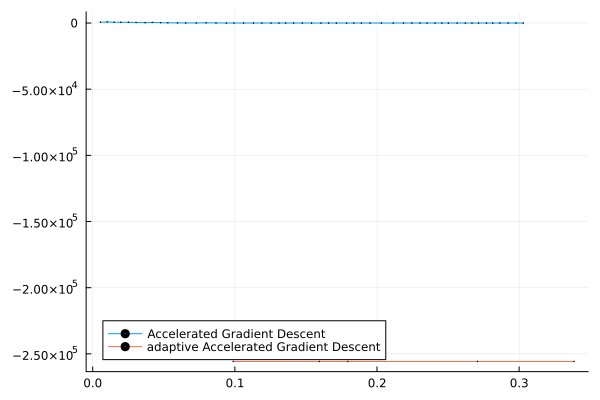

In [20]:
# plot(time_vectorGD[2:end], FS .- f_iteratesGD, label = "Gradient Descent", markershape=:circle, markersize=.4, ylims = (0, 800))
plot(time_vectorFGD[2:end], FS .- f_iteratesFGD, label = "Accelerated Gradient Descent", markershape=:circle, markersize=.4)
plot!(time_vectorFGM[2:end], FS .- f_iteratesFGM, label = "adaptive Accelerated Gradient Descent", markershape=:circle, markersize=.4)

In [2]:
BEinstances = []
for file in readdir("..\\data\\belgian"; join=true)
    push!(BEinstances, UT.load_data(file))
end

instance = BEinstances[6]
X0 = UT.LP_Relaxation(instance)
Obj0 = UT.Matching(instance).Obj
FS = maximum(load_object("..\\results\\december\\UltraOptimalRunsBE.jld2")[6][3])

-2.555339664864983e9

In [9]:
τ = 120
μ = 1e-6
x_starGD, iteratesGD, f_iteratesGD, time_vectorGD = OPT.tGradientMethod(instance, X0, τ, μ)
# x_starFGD, iteratesFGD, f_iteratesFGD, time_vectorFGD = OPT.tFastGradientMethod(instance, X0, τ, μ)
x_starFGM, iteratesFGM, f_iteratesFGM, time_vectorFGM = OPT.tnmbtFastGradientMethod(instance, X0, τ, μ)

([47.434920210452425, 45.46477940603683, 45.847495422778444, 44.60202711500203, 44.5696757455223, 44.53302042444879, 42.69023490866633, 45.36510978709828, 44.39045314700662, 45.185093866734825  …  47.43437711221939, 43.440711973182886, 45.21320439713499, 47.7717180950888, 45.374736653656285, 45.27556200548404, 45.30132490229924, 44.49674160422633, 44.1138365156329, 44.073593101360075], [[47.4682, 45.40111900618594, 45.803539506974786, 44.4739, 44.4739, 44.4739, 42.62419286057494, 45.28063247968028, 44.38513812217332, 45.27817300595931  …  47.44950054292583, 43.4767, 45.273213251231525, 47.81593622422252, 45.461554334449175, 45.47240781290494, 45.48768819172297, 44.4739, 44.125773526595744, 44.12577352659575], [47.46856984, 45.401654266185936, 45.80402258697479, 44.4743329, 44.4742878, 44.4742367, 42.624395260574936, 45.28086057968028, 44.385246522173325, 45.27809290595931  …  47.44947970288583, 43.4766500733, 45.27312983787152, 47.81587482420252, 45.461433547769175, 45.47213363956494, 

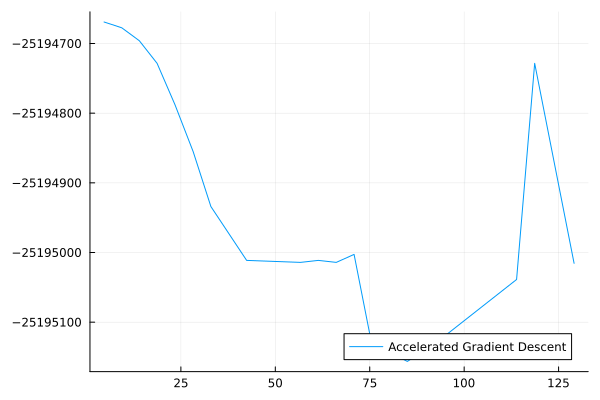

In [14]:
# plot(time_vectorGD[2:end], FS .- f_iteratesGD, label = "Gradient Descent")
plot(time_vectorFGM[2:end], FS .- f_iteratesFGM, label = "Accelerated Gradient Descent")